# Define Libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error

import warnings 
warnings.filterwarnings('ignore')

# Define Data

In [35]:
data = pd.read_csv('data.csv')
data

,\tEmail,Address,Avatar,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,12.66,39.58,4.08,587.95
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,11.11,37.27,2.66,392.20
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,11.33,37.11,4.10,487.55
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,13.72,36.72,3.12,581.85
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,12.80,37.54,4.45,599.41
...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872Lake Jamiefurt, U...",Tan,13.57,36.42,3.75,573.85
496,katrina56@gmail.com,"172 Owen Divide Suite 497West Richard, CA 19320",PaleVioletRed,11.70,37.19,3.58,529.05
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633South Chadburgh, TN...",Cornsilk,11.50,38.33,4.96,551.62
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808Brendachester, TX 0...",Teal,12.39,36.84,2.34,456.47


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   	Email                500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Time on App           500 non-null    float64
 4   Time on Website       500 non-null    float64
 5   Length of Membership  500 non-null    float64
 6   Yearly Amount Spent   500 non-null    float64
dtypes: float64(4), object(3)
memory usage: 27.5+ KB


In [37]:
data.describe()

,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.00000,500.000000
mean,12.052620,37.060480,3.53336,499.314240
std,0.994418,1.010555,0.99926,79.314764
min,8.510000,33.910000,0.27000,256.670000
25%,11.390000,36.347500,2.93000,445.037500
50%,11.980000,37.070000,3.53500,498.890000
75%,12.752500,37.720000,4.13000,549.312500
max,15.130000,40.010000,6.92000,765.520000


In [38]:
data.duplicated().sum()

0

In [39]:
data.isnull().sum()

\tEmail                 0
Address                 0
Avatar                  0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

# EDA

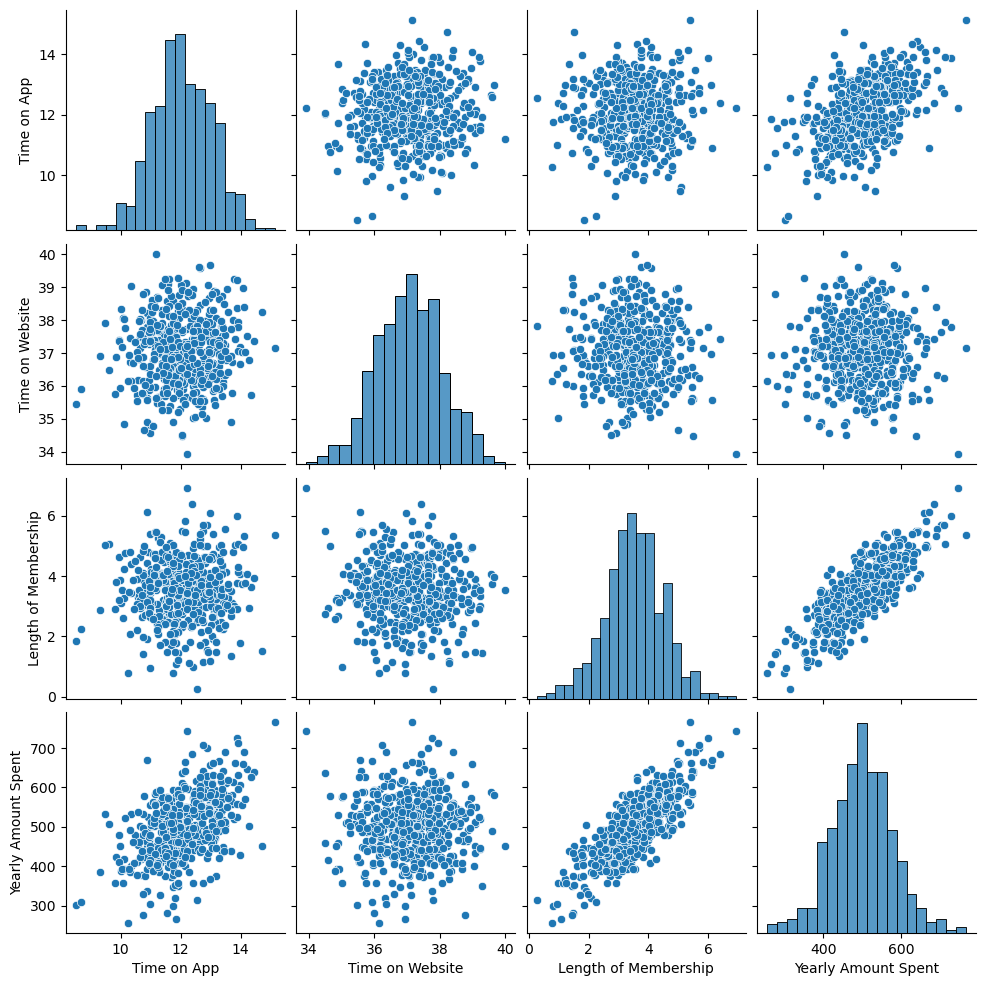

In [40]:
sns.pairplot(data , kind = 'scatter') # to compare all numarical value with target u 

# Create Model

In [41]:
x = data[['Time on App','Time on Website','Length of Membership',]]
y = data['Yearly Amount Spent']

In [42]:
x_train , x_test , y_train , y_test = train_test_split(x , y , train_size=0.8 , random_state=42)

In [43]:
LM = LinearRegression()
LM.fit(x_train,y_train)

LinearRegression()

In [44]:
pre = LM.predict(x_test)

In [45]:
LM.coef_

array([37.99274285,  0.53471024, 62.76998035])

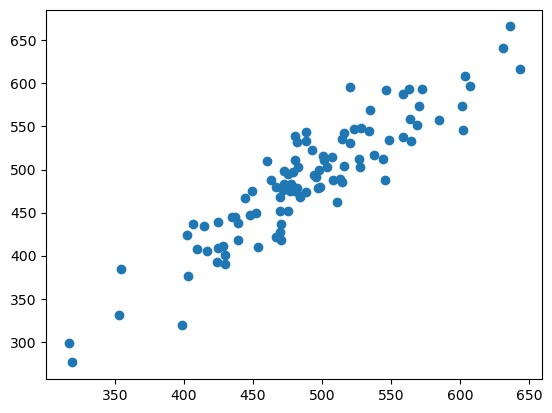

In [46]:
plt.scatter(pre, y_test)

In [47]:
mse = mean_squared_error(pre,y_test)
rmse = root_mean_squared_error(pre,y_test)
mae = mean_absolute_error(pre,y_test)

print(mse)
print(rmse)
print(mae)

806.8262850130459
28.404687729546435
23.136790455425498


# Evaluate The Model

In [48]:
residulas = y_test - pre
residulas

361   -28.499501
73    -13.874853
374   -51.734942
155   -11.981816
104   -43.250841
         ...    
347    20.853073
86     24.127381
75     -2.985984
438   -31.046468
15    -48.840407
Name: Yearly Amount Spent, Length: 100, dtype: float64

(array([ 1.,  0.,  0.,  1.,  1.,  2.,  3.,  2.,  2.,  6.,  6., 10.,  8.,
         1.,  7.,  7.,  5.,  7.,  3., 10.,  3.,  8.,  0.,  0.,  2.,  3.,
         1.,  0.,  0.,  1.]),
 array([-78.48974594, -73.34644478, -68.20314363, -63.05984247,
        -57.91654131, -52.77324016, -47.629939  , -42.48663784,
        -37.34333669, -32.20003553, -27.05673437, -21.91343322,
        -16.77013206, -11.6268309 ,  -6.48352975,  -1.34022859,
          3.80307257,   8.94637372,  14.08967488,  19.23297604,
         24.3762772 ,  29.51957835,  34.66287951,  39.80618067,
         44.94948182,  50.09278298,  55.23608414,  60.37938529,
         65.52268645,  70.66598761,  75.80928876]),
 <BarContainer object of 30 artists>)

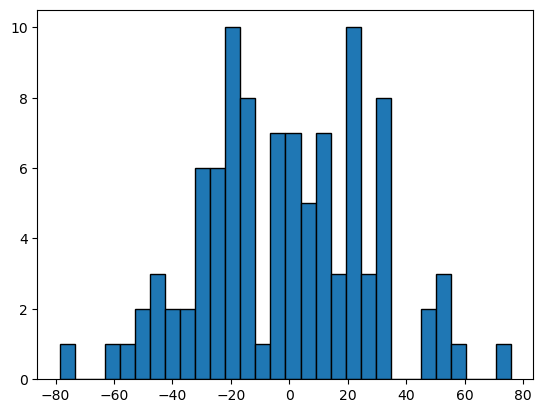

In [49]:
plt.hist(residulas , bins=30, edgecolor='black') #if the histo similar a normal dist that idicates to good model